# Linear Regression in Python
### Fitting Polynomial Functions to Data

#简介 

在观察实验结果的时候，能够对分散的数据点进行曲线拟合是非常重要的。在Python中这样做是相对简单的，但其背后的理论是有点复杂的。

有不同的方法来拟合散点的曲线。其中最经常使用的一种被称为线性最小二乘法，是贝叶斯广义拟合的一个子集。注意，我们可以用这种方法拟合任何阶数的多项式，而不仅仅是直线。线性 "部分指的是如何测量数据点和直线之间的距离，我们稍后会介绍。LLS方法为你的数据拟合出一条线，使所有的点和线之间的平方距离最小。选择平方距离的原因是，有些点将位于你的线下，但距离是正的。通过平方，我们允许线下的点与线的距离也是一个 "正 "的距离。生成LLS拟合的公式可以输出方程的常数（$a_0+a_1x+a_2x^2+$...），根据你的拟合程度/顺序，你需要多少阶都可以。对于线性情况，LLS会输出一个斜率和一个Y-截距。这个公式需要线性代数。



\begin{equation} \quad \begin{pmatrix}N & \sum x_i & \sum x_{i}^2 & \cdots & \sum x_{i}^m\\ \sum x_{i} & \sum x_{i}^2 & \sum x_{i}^3 & \cdots & x_{i}^{m+1}\\ \vdots & \vdots & \vdots & \ddots & \vdots\\ \sum x_{i}^m & \sum x_{i}^{m+1} & \sum x_{i}^{m+2} & \cdots & \sum x_{i}^{2m} \end{pmatrix} \begin{pmatrix} c_1 \\ c_2 \\ c_3 \\  \vdots \\ c_n \end{pmatrix}=\begin{pmatrix} \sum y_i \\ \sum x_i y_i \\ \vdots \\ \sum x^{n-1}y_i \end{pmatrix}\end{equation}

这可能看起来有点吓人，但它并不难实现。$N$是你试图拟合的数据点的数量。要输入$x$的和，只需利用你的x数组（如中心点数组），并对其运行np.sum（根据需要进行平方、立方等）。$y_i$是指
数据点的$y$值，它们可以在np.sum函数中乘以$x$数组。

### 拟合数据的直线

方程1展示了如何将任何阶次的多项式拟合到一组数据上（基于数组的大小）。练习简单地将一个1阶多项式（直线）拟合到一些数据上。在这种情况下，LLS公式简化为。

\begin{equation}
\quad
\begin{pmatrix} 
N & \sum x_i \\
\sum x_i & \sum x_{i}^2
\end{pmatrix}
\begin{pmatrix}
c_1 \\
c_2 \\
\end{pmatrix}=
\begin{pmatrix}
\sum y_i \\
\sum x_i y_i
\end{pmatrix}
\end{equation}

在这里我们要求出$c_1$和$c_2$，即最佳拟合的斜率和截距。我们知道N（就是数据点的数量），我们知道$x_i$和$y_i$，所以现在只需要弄清楚如何用python做矩阵乘法。如果我们记得（或速成）我们的线性代数，为了得到$c_1$, $c_2$本身，我们需要将左边的两边*乘以（N...）数组的*逆。所以我们得出。

\begin{equation}
\quad
\begin{pmatrix}
c_1 \\
c_2 \\
\end{pmatrix}=
\begin{pmatrix} 
N & \sum x_i \\
\sum x_i & \sum x_{i}^2
\end{pmatrix}^{-1}
\begin{pmatrix}
\sum y_i \\
\sum x_i y_i
\end{pmatrix}
\end{equation}

其中(N...)矩阵的逆值现在被点入($sum y_i$...)数组。在设置时，你会发现这些函数很有用。
- np.linalg.inv(arr)
- np.dot(arr1, arr2)

记住，要设置多维数组，格式是np.array( [ [a,b,c,...] , [d,e,f,g,...], ...] )
也就是说，列表嵌套在函数调用中的列表内。

### 载入数据


Text(0.5, 1.0, 'Data to Fit')

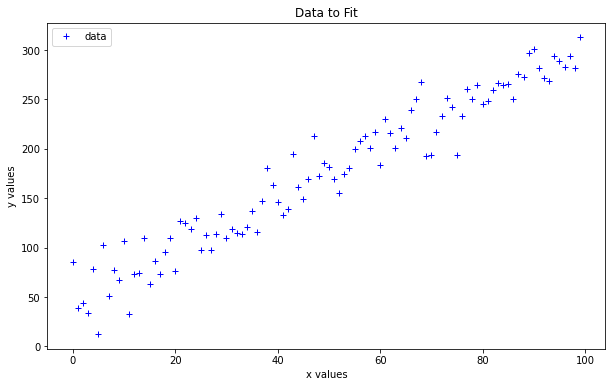

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
x,y = np.loadtxt('data.txt', unpack=True)


plt.plot(x,y,'b+',label='data')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Data to Fit')


让我们定义一个名为linear_fit的函数，实现上面给出的方程，并返回两个值：斜率$m$和y-截距。

In [7]:
def linear_fit(x_data, y_data):
    #fill in code here
    N = len(x_data)
    array_1 = np.array([[N, np.sum(x_data)],[np.sum(x_data),np.sum(x_data**2)]])
    array_3 = np.array([[np.sum(y_data)],[np.sum(y_data*x_data)]])
    array_1_inv = np.linalg.inv(array_1)
    out_arr = np.dot(array_1_inv,array_3)
    intercept, slope = out_arr[0], out_arr[1]
    return slope, intercept

In [8]:
linear_fit(x,y)

(array([ 2.57251848]), array([ 47.7249833]))

现在我们有了 "最佳拟合 "数据的y截距和斜率。从科学的角度来看，基本上已经完成了--在拟合时，感兴趣的几乎都是斜率和截距的值。但为了看看我们的成果，让我们在数据上绘制最佳拟合线。

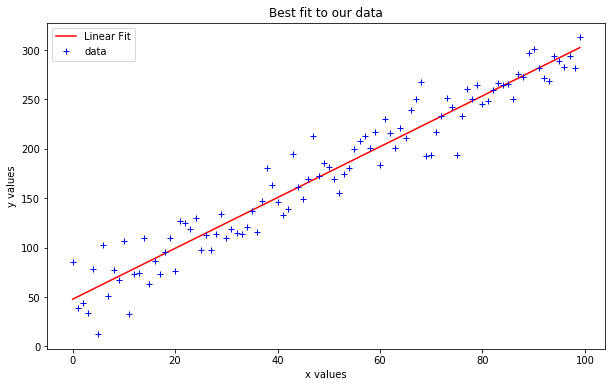

In [9]:
def plot_fit(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    plt.plot(x,fit_line,'r',label='Linear Fit')
    plt.plot(x,y,'b+',label='data')
    plt.legend()
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title('Best fit to our data')
    plt.show()
    

plot_fit(x,y)

###评估拟合度
因此，我们有一个与我们的数据的拟合。它是一个很好的拟合吗？从视觉上看，它似乎是这样。但我们可以做得更量化一点。

为了做到这一点，我们将评估**残留物，**也就是我们的拟合预测和我们的数据本身之间的*差。鉴于我们的数据没有不确定性（至少，没有指定的不确定性），这很容易计算。填写下面的残差函数，简单地返回拟合和数据之间的差异，以及一个单一的数量，就是这些残差的总和。作为一个任意的惯例，从数据中减去拟合，而不是反过来。

In [10]:
def return_residuals(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    residuals = y - fit_line
    return residuals, np.sum(residuals)

In [11]:
residuals, sum_residuals = return_residuals(x,y)
print sum_residuals

6.07514039075e-12


如果看一下残差的总和，会发现它是一个小值，大约是6e-12。这意味着，尽管残差可能很大，但平均来说，拟合的数据预测过高和预测过低的数量是相等的，这是一个良好拟合的标志。

### 高阶多项式拟合

好了，我们已经成功地将一条直线（多项式阶数1）拟合到我们的数据上。但是，如果数据由二次函数描述会更好呢？当我们绘制它时，它可能看起来是线性的，但可能是我们所能接触到的数据的 "部分 "很小，我们不能很好地看到整体曲率。

我们可以对我们的数据进行任何阶数的多项式拟合（注意避免过度拟合--记住，一个足够高的阶数的多项式可以拟合*任何*有0残差的数据集，但看起来会很古怪）。但是，与其像上面那样痛苦地构建一个3x3数组，不如继续利用Numpy模块中为此目的而创建的方便的函数--因为我们现在知道它是如何工作的。

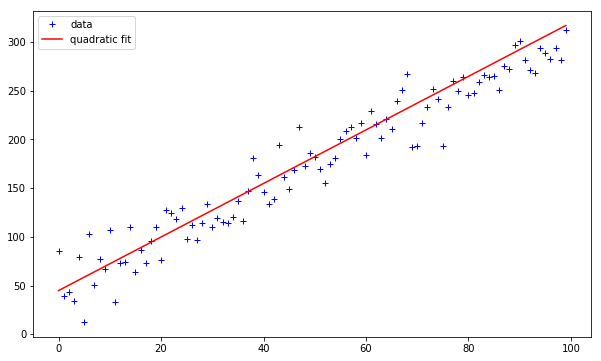

In [12]:
def quadratic_fit(x,y):
    fit_coefficients = np.polyfit(x,y,2)
    a0, a1, a2 = fit_coefficients[0], fit_coefficients[1], fit_coefficients[2]
    return a0, a1, a2
def plot_quadratic_fit(x,y):
    a0, a1, a2 = quadratic_fit(x,y)
    fit_line = x*a0**2 + x*a1 + a2
    plt.plot(x,y,'b+',label='data')
    plt.plot(x,fit_line,'r',label='quadratic fit')
    plt.legend()
    plt.show()
    
plot_quadratic_fit(x,y)

这看起来也可能是一个体面的拟合，尽管它看起来没有线性拟合那么好。事实上，如果你把它们打印出来，你会看到Polyfit告诉我们，它认为*如果*这个数据是二次函数，那么二次函数的系数非常小；其余的线性和常数系数与我们的线性拟合中的系数非常相似。让我们看一下残差。

In [13]:
def quadratic_residuals(x,y):
    a0,a1,a2 = quadratic_fit(x,y)
    fit_line = x*a0**2 + x*a1 + a2
    residuals = y - fit_line
    return residuals, np.sum(residuals)

q_residuals, q_residual_sum = quadratic_residuals(x,y)
print q_residual_sum

-589.420968021


二次方的净残差之和要大得多。因此，在这里看来，线性拟合更好，例如，数据很可能*是*线性的。

如果为每个数据点绘制线性和二次拟合的残差，会发现它们在形式上很相似。通常情况下，如果数据真的是二次的，线性残差会有一个很强的函数形式（先低后高，再低的拟合）。

拟合数据是数据分析的一个**大方面，如果我们的数据点有不同的不确定性，我们该如何拟合？如果$x$和$y$的测量值都有相关的不确定性怎么办？。如果我们在多维参数空间进行拟合怎么办？我们如何拟合本质上是函数但不是多项式的曲线（如高斯、指数、其他函数的组合等）？